# Data Cleaning and Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I start by reading in the dataframe using pd.read_csv.

In [5]:
customer_data = pd.read_csv('1345_customer_results.csv')

In [6]:
customer_data.shape

(30293, 23)

In [7]:
customer_data

,Case ID,Origin,Origin Created At,Content ID,URL,Labeling State,Series,Series Index,Patch,Qualified Reads,...,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Internal Notes,Comments,Explanation
0,5888087,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386,https://go.centaurlabs.com/problem/5888087,Gold Standard,NaN,NaN,NaN,2,...,1.000,'no',2,1.54,'yes',0,0.00,NaN,[],NaN
1,5888088,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387,https://go.centaurlabs.com/problem/5888088,Gold Standard,NaN,NaN,NaN,3,...,1.000,'no',3,2.34,'yes',0,0.00,NaN,[],NaN
2,5888089,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264388,https://go.centaurlabs.com/problem/5888089,Gold Standard,NaN,NaN,NaN,2,...,1.000,'no',2,1.70,'yes',0,0.00,NaN,[],NaN
3,5888090,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264389,https://go.centaurlabs.com/problem/5888090,Gold Standard,NaN,NaN,NaN,1,...,1.000,'no',1,0.82,'yes',0,0.00,NaN,[],NaN
4,5888091,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264390,https://go.centaurlabs.com/problem/5888091,In Progress,NaN,NaN,NaN,7,...,0.571,'yes',4,3.28,'no',3,2.32,NaN,[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30288,5918375,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294674,https://go.centaurlabs.com/problem/5918375,Gold Standard,NaN,NaN,NaN,2,...,1.000,'yes',2,1.56,'no',0,0.00,NaN,[],NaN
30289,5918376,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294675,https://go.centaurlabs.com/problem/5918376,Gold Standard,NaN,NaN,NaN,3,...,0.667,'yes',2,1.56,'no',1,0.76,NaN,[],NaN
30290,5918377,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294676,https://go.centaurlabs.com/problem/5918377,In Progress,NaN,NaN,NaN,6,...,1.000,'yes',6,4.78,'no',0,0.00,NaN,[],NaN
30291,5918378,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294677,https://go.centaurlabs.com/problem/5918378,Gold Standard,NaN,NaN,NaN,0,...,NaN,'yes',0,0.00,'no',0,0.00,NaN,[],NaN


First, I know that we only want to be analyzing images that have the "Gold Standard" label, meaning I can drop any images that don't have this status. I'm going to create a new dataframe to represent the cleaned dataframe.

In [8]:
#results_data = customer_data.loc[customer_data['Labeling State'] == 'Gold Standard']

This line of code aims to check if there are any datapoints in the columns 'Series', 'Series Index', and 'Patch' that are not an np.nan. The resulting subsetted dataframe is empty, meaning that all three columns are filled with NaN, meaning they should be dropped.

In [9]:
customer_data.loc[(customer_data['Series'].notna()) | (customer_data['Series Index'].notna()) | (customer_data['Patch'].notna())]

,Case ID,Origin,Origin Created At,Content ID,URL,Labeling State,Series,Series Index,Patch,Qualified Reads,...,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Internal Notes,Comments,Explanation


In [10]:
results_data = customer_data.drop(['Series', 'Series Index', 'Patch'], axis = 1)

Next, I know from the documentation that the Case ID value is unique to each case. For this reason, I'm going to set the Case ID as the index for the entire dataframe.

In [11]:
results_data.set_index('Case ID', inplace = True)

I see that many of the Internal Notes and Explanation values are np.nan, and the Comments are empty. I'm going to run a subsetting check to see if there is anything useful in any of those columns

In [12]:
results_data.loc[(results_data['Internal Notes'].notna()) | (results_data['Comments'] != '[]') | (results_data['Explanation'].notna())]

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Internal Notes,Comments,Explanation
Case ID,,,,,,,,,,,,,,,,,,,
5892332,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:43:57 PM,3268631,https://go.centaurlabs.com/problem/5892332,Gold Standard,1,'no','no',0.000,1.000,'no',1,0.80,'yes',0,0.00,NaN,['There was rapid and spiky rates so why am I ...,NaN
5894116,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:44:51 PM,3270415,https://go.centaurlabs.com/problem/5894116,Gold Standard,5,'no','yes',1.000,1.000,'yes',5,4.00,'no',0,0.00,NaN,['Can someone explain why the answer is “no”?'],NaN
5896433,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:46:04 PM,3272732,https://go.centaurlabs.com/problem/5896433,Gold Standard,3,'yes','no',1.000,1.000,'no',3,2.32,'yes',0,0.00,NaN,['??'],NaN
5899520,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:47:40 PM,3275819,https://go.centaurlabs.com/problem/5899520,Gold Standard,2,'yes','no',1.000,1.000,'no',2,1.58,'yes',0,0.00,NaN,"[""i can't see any spike in this question so wh...",NaN
5900998,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:48:26 PM,3277297,https://go.centaurlabs.com/problem/5900998,Gold Standard,2,'no','yes',1.000,1.000,'yes',2,1.56,'no',0,0.00,NaN,['There is obviously a peak happened in there'],NaN
5901914,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:48:54 PM,3278213,https://go.centaurlabs.com/problem/5901914,Gold Standard,6,'yes','no',1.000,1.000,'no',6,4.72,'yes',0,0.00,NaN,['No spike present'],NaN
5902040,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:48:58 PM,3278339,https://go.centaurlabs.com/problem/5902040,Gold Standard,2,'no','yes',1.000,1.000,'yes',2,1.58,'no',0,0.00,NaN,['How?'],NaN
5904120,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:53:07 PM,3280419,https://go.centaurlabs.com/problem/5904120,Gold Standard,1,'yes','no',1.000,1.000,'no',1,0.78,'yes',0,0.00,NaN,['How? '],NaN
5904413,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:53:16 PM,3280712,https://go.centaurlabs.com/problem/5904413,Gold Standard,3,'yes','no',1.000,1.000,'no',3,2.46,'yes',0,0.00,NaN,['Multiple?'],NaN


I'm glad I checked. There are multiple rows with comments that are worth checking. It also seems like where there are comments, there is some disagreement between answer choices. However, I don't see anything worthwhile in Internal Notes or Explanations, so I will drop those.

In [13]:
results_data.drop(['Internal Notes', 'Explanation'], axis = 1, inplace = True)

In [14]:
results_data
#checking the data

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Comments
Case ID,,,,,,,,,,,,,,,,,
5888087,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386,https://go.centaurlabs.com/problem/5888087,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.54,'yes',0,0.00,[]
5888088,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387,https://go.centaurlabs.com/problem/5888088,Gold Standard,3,'no','no',0.000,1.000,'no',3,2.34,'yes',0,0.00,[]
5888089,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264388,https://go.centaurlabs.com/problem/5888089,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.70,'yes',0,0.00,[]
5888090,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264389,https://go.centaurlabs.com/problem/5888090,Gold Standard,1,'no','no',0.000,1.000,'no',1,0.82,'yes',0,0.00,[]
5888091,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264390,https://go.centaurlabs.com/problem/5888091,In Progress,7,NaN,'yes',NaN,0.571,'yes',4,3.28,'no',3,2.32,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918375,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294674,https://go.centaurlabs.com/problem/5918375,Gold Standard,2,'no','yes',1.000,1.000,'yes',2,1.56,'no',0,0.00,[]
5918376,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294675,https://go.centaurlabs.com/problem/5918376,Gold Standard,3,'no','yes',0.667,0.667,'yes',2,1.56,'no',1,0.76,[]
5918377,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294676,https://go.centaurlabs.com/problem/5918377,In Progress,6,NaN,'yes',NaN,1.000,'yes',6,4.78,'no',0,0.00,[]


Next, I want to be able to sort out all the links in the 'Origin' column that either do not end with a Vote[N] or the [N] is a number that is not between 0 and 8 (e.g. 9). This N represents the number of experts that voted 'yes' to whether there was an abnormality in the medical image or not. I also have to consider the case where N = 4, meaning that the vote was split half in half. 

First, I'll subset a few of the links to get a good look at them:

In [15]:
results_data['Origin'].iloc[0]

'https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B14_time139137_medoid_vote2.jpg'

In [16]:
results_data['Origin'].iloc[1]

'https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B10_time178433_medoid_vote0.jpg'

In [18]:
results_data['Origin'].iloc[4000]

'https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/P10056_time115915_member_vote4.jpg'

In [19]:
from re import fullmatch

In [20]:
mask = results_data['Origin'].str.fullmatch(r'(.*)vote[0-8](.*)', case = False)
#creates a mask of where this is true and where it is not

Here, I'll use a mask to create a new dataset which is confirmed to have voting data. Then, I'll take a look at the data:

In [21]:
refined_data = results_data[mask]

In [22]:
refined_data

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Comments
Case ID,,,,,,,,,,,,,,,,,
5888087,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386,https://go.centaurlabs.com/problem/5888087,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.54,'yes',0,0.00,[]
5888088,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387,https://go.centaurlabs.com/problem/5888088,Gold Standard,3,'no','no',0.000,1.000,'no',3,2.34,'yes',0,0.00,[]
5888089,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264388,https://go.centaurlabs.com/problem/5888089,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.70,'yes',0,0.00,[]
5888090,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264389,https://go.centaurlabs.com/problem/5888090,Gold Standard,1,'no','no',0.000,1.000,'no',1,0.82,'yes',0,0.00,[]
5888091,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264390,https://go.centaurlabs.com/problem/5888091,In Progress,7,NaN,'yes',NaN,0.571,'yes',4,3.28,'no',3,2.32,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918375,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294674,https://go.centaurlabs.com/problem/5918375,Gold Standard,2,'no','yes',1.000,1.000,'yes',2,1.56,'no',0,0.00,[]
5918376,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294675,https://go.centaurlabs.com/problem/5918376,Gold Standard,3,'no','yes',0.667,0.667,'yes',2,1.56,'no',1,0.76,[]
5918377,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294676,https://go.centaurlabs.com/problem/5918377,In Progress,6,NaN,'yes',NaN,1.000,'yes',6,4.78,'no',0,0.00,[]


Next, I understand that I'm going to be taking a look at the special case where the votes are equal. I've decided to subset this by using the same regex expression but using the specific case of "vote4". I used the mask approach to create a subsetted dataframe, which I will examine. 

In [23]:
equal_votes = refined_data['Origin'].str.fullmatch(r'(.*)vote4(.*)', case = False)

In [24]:
equal_votes_data = refined_data.loc[equal_votes]

In [25]:
equal_votes_data

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Comments
Case ID,,,,,,,,,,,,,,,,,
5888091,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264390,https://go.centaurlabs.com/problem/5888091,In Progress,7,NaN,'yes',NaN,0.571,'yes',4,3.28,'no',3,2.32,[]
5888782,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:42:06 PM,3265081,https://go.centaurlabs.com/problem/5888782,In Progress,5,NaN,'no',NaN,1.000,'no',5,3.94,'yes',0,0.00,[]
5891822,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:43:42 PM,3268121,https://go.centaurlabs.com/problem/5891822,In Progress,5,NaN,'yes',NaN,0.800,'yes',4,3.10,'no',1,0.76,[]
5891960,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:43:46 PM,3268259,https://go.centaurlabs.com/problem/5891960,In Progress,7,NaN,'no',NaN,1.000,'no',7,5.53,'yes',0,0.00,[]
5891979,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:43:47 PM,3268278,https://go.centaurlabs.com/problem/5891979,In Progress,8,NaN,'no',NaN,0.625,'no',5,3.92,'yes',3,2.38,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918358,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:14 PM,3294657,https://go.centaurlabs.com/problem/5918358,In Progress,13,NaN,'yes',NaN,0.769,'yes',10,7.84,'no',3,2.36,[]
5918360,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:14 PM,3294659,https://go.centaurlabs.com/problem/5918360,In Progress,5,NaN,'yes',NaN,1.000,'yes',5,3.92,'no',0,0.00,[]
5918363,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:14 PM,3294662,https://go.centaurlabs.com/problem/5918363,In Progress,8,NaN,'yes',NaN,1.000,'yes',8,6.26,'no',0,0.00,[]


In [26]:
equal_votes_data['Labeling State'].unique() 
#Notice that the only 'Labeling State' option for when the votes are split 4-4 is "In Progress",
#indicating that the data is not ready for "Gold Standard".

array(['In Progress'], dtype=object)

The task is to vette these labels and find a way to break the tie and turn them into "Gold Standard" labels. How are we supposed to do that? To label the medical images, we can use the qualified reads we are given in the data to break the tie. However, we need to prove that the crowdsourced data is reliable. This is where the idea comes in of showing that the crowd agrees with experts more than experts do with each other. 

I will start with this by creating columns that represent the number of experts that vote "yes". The origin link is helpful because I can source that number straight from there. 

In [27]:
import re

In [28]:
def calculate_experts(string = refined_data['Origin']):
    substring = re.search(r'vote[0-8]', string)
    return int(substring.group()[-1])
    

In [29]:
refined_data['Experts Voted Yes'] = refined_data['Origin'].apply(calculate_experts)

C:\Users\micha\AppData\Local\Temp\ipykernel_63464\4030270293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_data['Experts Voted Yes'] = refined_data['Origin'].apply(calculate_experts)


In [30]:
refined_data
#Across the cases, calculate percentage of qualified readers that vote 'yes' out of total people vs. percentage of experts 
#that vote yes out of total experts
#On a graph, show clumps of data and try to find a line of best fit

#If I want to gauge the accuracy, use heuristic to weigh their accuracy. 5 voters, say one voter has 90% accuracy,
#another has 80% accuracy, 

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Comments,Experts Voted Yes
Case ID,,,,,,,,,,,,,,,,,,
5888087,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386,https://go.centaurlabs.com/problem/5888087,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.54,'yes',0,0.00,[],2
5888088,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387,https://go.centaurlabs.com/problem/5888088,Gold Standard,3,'no','no',0.000,1.000,'no',3,2.34,'yes',0,0.00,[],0
5888089,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264388,https://go.centaurlabs.com/problem/5888089,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.70,'yes',0,0.00,[],0
5888090,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264389,https://go.centaurlabs.com/problem/5888090,Gold Standard,1,'no','no',0.000,1.000,'no',1,0.82,'yes',0,0.00,[],0
5888091,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264390,https://go.centaurlabs.com/problem/5888091,In Progress,7,NaN,'yes',NaN,0.571,'yes',4,3.28,'no',3,2.32,[],4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918375,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294674,https://go.centaurlabs.com/problem/5918375,Gold Standard,2,'no','yes',1.000,1.000,'yes',2,1.56,'no',0,0.00,[],2
5918376,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294675,https://go.centaurlabs.com/problem/5918376,Gold Standard,3,'no','yes',0.667,0.667,'yes',2,1.56,'no',1,0.76,[],3
5918377,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294676,https://go.centaurlabs.com/problem/5918377,In Progress,6,NaN,'yes',NaN,1.000,'yes',6,4.78,'no',0,0.00,[],4


I've successfully created a column that directly tells us the amount of experts that voted yes. How can I use this to my advantage?

I think it will be helpful to analyze not just whether a label is 'yes' or 'no' but the amount of people that say 'yes' versus the total amount of people. This will allow me to convert the answers from simple binary data to continuous percentages. If I do this for both the experts (experts that say yes / total experts) and the qualified readers (n in crowd that say yes / total readers), then I can compare how much the readers agree with the experts. Otherwise, I wouldn't be able to quantify the amount that the crowd agrees with the experts.

Now I need to figure out a way to create those two columns:

In [31]:
refined_data['%Experts Voted Yes'] = refined_data['Experts Voted Yes']/8
#Here I create my percent column of experts voting yes

C:\Users\micha\AppData\Local\Temp\ipykernel_63464\1665384837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_data['%Experts Voted Yes'] = refined_data['Experts Voted Yes']/8


Creating the column of user percentages will be a bit harder just because of the way that the data is structured.

In [32]:
def percent_user_yes(data):
    if data['Majority Label'] == "'yes'":
        percent_value = data['First Choice Votes']/data['Qualified Reads']
    elif data['Majority Label'] == "'no'":
        percent_value = data['Second Choice Votes']/data['Qualified Reads']
    else:
        percent_value = np.nan
    return percent_value

#majority = refined_data['Majority Label'], firstc = refined_data['First Choice Votes'], secondc = refined_data['Second Choice Votes'], qualf = refined_data['Qualified Reads']

In [33]:
refined_data['%Readers Voted Yes'] = refined_data.apply(percent_user_yes, axis = 1)

C:\Users\micha\AppData\Local\Temp\ipykernel_63464\4169622662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_data['%Readers Voted Yes'] = refined_data.apply(percent_user_yes, axis = 1)


In [34]:
refined_data

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Comments,Experts Voted Yes,%Experts Voted Yes,%Readers Voted Yes
Case ID,,,,,,,,,,,,,,,,,,,,
5888087,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386,https://go.centaurlabs.com/problem/5888087,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.54,'yes',0,0.00,[],2,0.250,0.000000
5888088,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387,https://go.centaurlabs.com/problem/5888088,Gold Standard,3,'no','no',0.000,1.000,'no',3,2.34,'yes',0,0.00,[],0,0.000,0.000000
5888089,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264388,https://go.centaurlabs.com/problem/5888089,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.70,'yes',0,0.00,[],0,0.000,0.000000
5888090,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264389,https://go.centaurlabs.com/problem/5888090,Gold Standard,1,'no','no',0.000,1.000,'no',1,0.82,'yes',0,0.00,[],0,0.000,0.000000
5888091,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264390,https://go.centaurlabs.com/problem/5888091,In Progress,7,NaN,'yes',NaN,0.571,'yes',4,3.28,'no',3,2.32,[],4,0.500,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918375,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294674,https://go.centaurlabs.com/problem/5918375,Gold Standard,2,'no','yes',1.000,1.000,'yes',2,1.56,'no',0,0.00,[],2,0.250,1.000000
5918376,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294675,https://go.centaurlabs.com/problem/5918376,Gold Standard,3,'no','yes',0.667,0.667,'yes',2,1.56,'no',1,0.76,[],3,0.375,0.666667
5918377,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294676,https://go.centaurlabs.com/problem/5918377,In Progress,6,NaN,'yes',NaN,1.000,'yes',6,4.78,'no',0,0.00,[],4,0.500,1.000000


In [35]:
stripped_data = refined_data.loc[(refined_data['%Readers Voted Yes'] != 1) & (refined_data['%Readers Voted Yes'] != 0)]
#filtering out the 1 and 0 agreements since there are so many of them

Here we can see that we've successfully created two columns: one that calculates the % of experts that agree on 'yes', and one that calculates the % of qualified readers (in other words, the crowd) that agree on 'yes'. With this data, it's time to finally move into Exploratory Data Analysis.

## Exploratory Data Analysis 1
Here I'm going to compare the percentage of experts that say "yes" to the percentage of readers that say "yes". The goal of this is to show where the experts agree with the readers and how often. I will use a scatterplot to see if there is a correlation between agreement of the readers and agreement of the experts. 

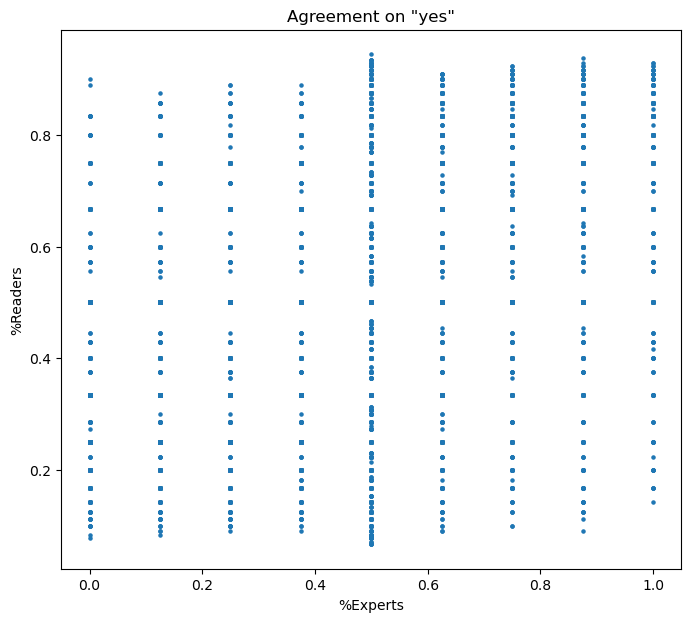

In [36]:
plt.figure(figsize = (8,7))

plt.scatter(stripped_data['%Experts Voted Yes'], stripped_data['%Readers Voted Yes'], s = 5)
plt.title('Agreement on "yes"')

plt.xlabel('%Experts')
plt.ylabel('%Readers')

plt.show()

We've run into an issue with the data. It seems that there is no pattern in any of the data, and there seems to be nothing useful we can really extrapolate. It looks like there is no correlation between the times that the crowd agrees and the time that the experts agree. Maybe we have to start checking to make sure that there are _enough_ qualified reads on a label. I will start by checking the case where there are 8 or more qualified reads and see if that helps accuracy. I use 8 because at that number, the Qualified Readers matches the number of Experts.

In [64]:
above_eight_reads = stripped_data.loc[stripped_data['Qualified Reads'] >= 8]

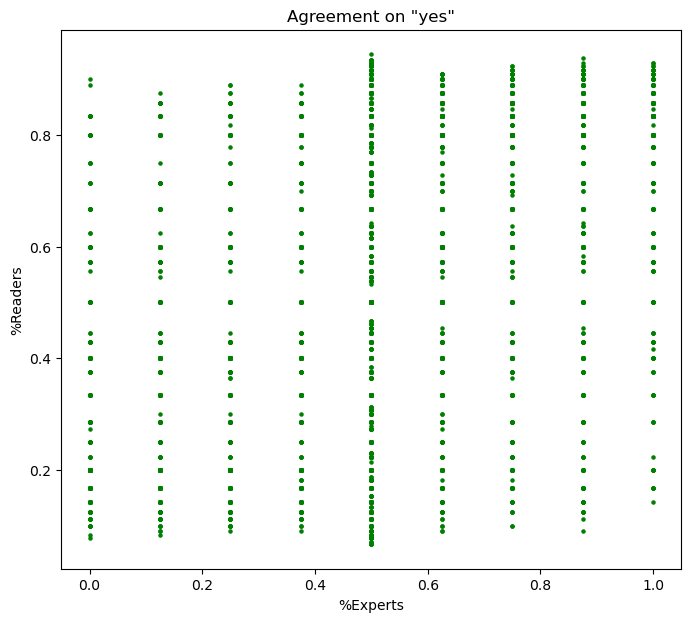

In [65]:
plt.figure(figsize = (8,7))

plt.scatter(above_five_reads['%Experts Voted Yes'], above_five_reads['%Readers Voted Yes'], s = 5, color = 'green')
plt.title('Agreement on "yes"')

plt.xlabel('%Experts')
plt.ylabel('%Readers')

plt.show()

Hmmm...this still looks very similar to the scatterplot we had before where there is no pattern. However, let's try visualizing crowd agreement at _each point_ of the expert data, seeing as the expert agreement percentages can be considered discretes since they are all fractions of eight (e.g., 0, 0.125, 0.25, etc.). 

[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]


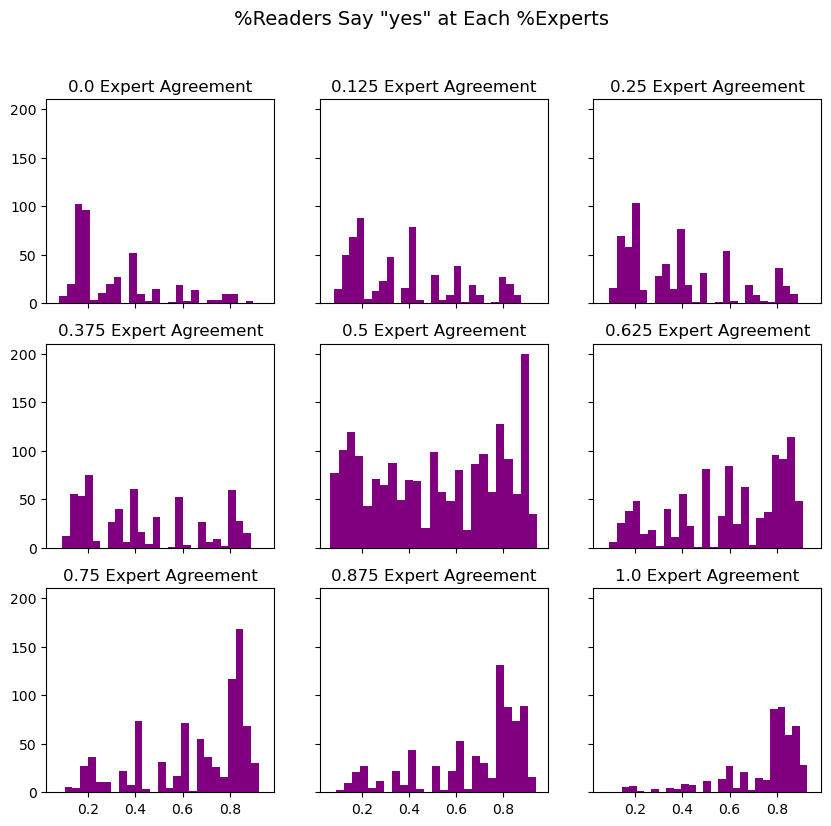

In [66]:
import itertools
fig, axs = plt.subplots(3,3, sharex = True, sharey = True, figsize = (10,9))
iteration = list(np.linspace(0, 1, 9))

coordinates = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)]
plt.suptitle('%Readers Say "yes" at Each %Experts', fontsize = 14)
print(iteration)
for i, position in zip(iteration, coordinates):
    data_at_each_expert = above_five_reads.loc[stripped_data['%Experts Voted Yes'] == i]
    axs[position].hist(data_at_each_expert['%Readers Voted Yes'], color = 'purple', bins = 25)
    axs[position].set_title(str(i) + ' Expert Agreement')
    #data_at_each_expert = above_five_reads.loc[stripped_data['%Experts Voted Yes'] == 1]

    #plt.figure(figsize = (8,7))
    #plt.hist(test['%Readers Voted Yes'], bins = 20, color = 'black')
    #plt.show()

These visualizations show us that when there are more Qualified Readers (at least 8), the percent of readers that answer "yes" actually correlates fairly well with the amount of experts that say "yes". I imagine that this correlation will only become more clear as we increase the threshold of Qualified Readers. 
### In essence, we can say that Qualified Readers agree with Experts, but their agreement is only reliable when when there are multiple Qualified Readers to give their opinion on a medical image.

## Exploratory Data Analysis 2
I'm going to compare the weights of the non-split vote datapoints to the split-vote datapoints in order to check if the weights are more evened out when there is a split-vote or not. A scatterplot will help me visualize this data by showing me the level of accuracy there is between the two choices 'yes' and 'no' when there is a split vote.

Here, I'll quickly create a subset of all the data that doesn't have a split-vote, or in other words, all the data where the origin link doesn't end in "vote4". This will be useful to examine the qualities and statistics that set split-vote cases apart from normal ones.

Here I check that a dataframe filled with NaN for 'Correct Label' is the same thing as a dataframe with all origin links ending in 'vote4'. In other words, I've just verified that wherever there is a split-vote, a correct label is missing. The question is: how do we identify a correct label for data like this?

In [461]:
non_split_data = refined_data.loc[~equal_votes]

In [462]:
(results_data.loc[results_data['Correct Label'].isna()] == equal_votes_data).value_counts()

Origin  Origin Created At  Content ID  URL   Labeling State  Qualified Reads  Correct Label  Majority Label  Difficulty  Agreement  First Choice Answer  First Choice Votes  First Choice Weight  Second Choice Answer  Second Choice Votes  Second Choice Weight  Comments
True    True               True        True  True            True             False          True            False       True       True                 True                True                 True                  True                 True                  True        3000
dtype: int64

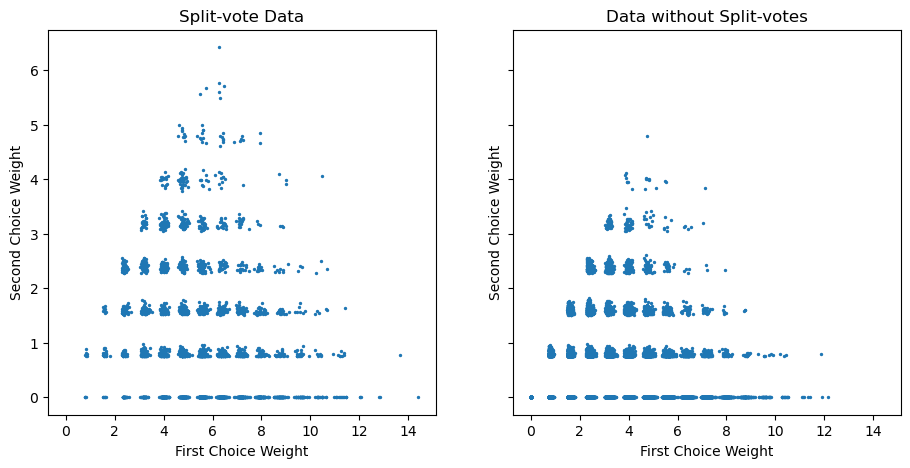

In [463]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (11,5))

ax1.scatter(equal_votes_data['First Choice Weight'], equal_votes_data['Second Choice Weight'], s = 2)
ax1.set_title('Split-vote Data')

ax2.scatter(non_split_data['First Choice Weight'], non_split_data['Second Choice Weight'], s = 2)
ax2.set_title('Data without Split-votes')

ax1.set_ylabel('Second Choice Weight')
ax1.set_xlabel('First Choice Weight')
ax2.set_ylabel('Second Choice Weight')
ax2.set_xlabel('First Choice Weight')

plt.show()

Here I am comparing the data from 4-4 expert splits versus the rest of the data. Here we can see that especially in the 4-4 split data, the data is more spread out, and second choice weight is higher than normal. For us, this means that qualified readers are also disagreeing more because their cumulative accuracy is higher. 